## Problem Statement

Build and evaluate classification models to predict loan approval status using the `loan_data.csv` dataset, summarizing findings and identifying the best-performing model. The goal is to develop a reliable system that can automate loan decisions, assess risk, improve efficiency, and potentially monitor for fairness in lending practices.

## Data Description

The `loan_data.csv` dataset contains `45,000` entries and `14` columns, with no missing values. The columns include a mix of numerical and categorical features related to personal information, loan details, and credit history. Here's a brief overview of the key columns:

### Numerical Features:
*   `person_age`: Age of the person (originally with outliers up to 144, capped at 100 during preprocessing).
*   `person_income`: Annual income of the person (range from 8,000 to 7,200,766).
*   `person_emp_exp`: Employment experience in years (originally with outliers up to 125, capped at 60 during preprocessing).
*   `loan_amnt`: The amount of the loan requested (range from 500 to 35,000).
*   `loan_int_rate`: Interest rate of the loan (range from 5.42 to 20.00).
*   `loan_percent_income`: Loan amount as a percentage of income (range from 0.00 to 0.66).
*   `cb_person_cred_hist_length`: Length of person's credit history (range from 2 to 30 years).
*   `credit_score`: Credit score of the person (range from 390 to 850).

### Categorical Features:
*   `person_gender`: Gender of the person (`2` unique values, likely 'male' and 'female').
*   `person_education`: Educational background of the person (`5` unique values, e.g., 'Master', 'High School', 'Bachelor').
*   `person_home_ownership`: Type of home ownership (`4` unique values, e.g., 'RENT', 'OWN', 'MORTGAGE').
*   `loan_intent`: Purpose of the loan (`6` unique values, e.g., 'PERSONAL', 'EDUCATION', 'MEDICAL', 'HOMEIMPROVEMENT', 'DEBTCONSOLIDATION', 'VENTURE').
*   `previous_loan_defaults_on_file`: Indicates if the person has previous loan defaults (`2` unique values, 'Yes' or 'No').

### Target Variable:
*   `loan_status`: The approval status of the loan (`0` for not approved/default, `1` for approved/no default). This is the variable we aim to predict.

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan_data.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


## Understand the Dataset

Perform an initial exploratory data analysis to understand the dataset, including checking data types, missing values, and descriptive statistics for each column in the `df` DataFrame.


In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


**Rationale**:
To get a concise summary of the DataFrame, including data types and non-null values, I will use the `info()` method on `df`.



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

**Rationale**:
To identify any missing data that might need to be handled, I will calculate the sum of null values for each column in the DataFrame `df`.



In [5]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


**Rationale**:
To understand the distribution and central tendency of numerical features, I will generate descriptive statistics for all numerical columns in the DataFrame `df` using the `describe()` method.



In [6]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


**Rationale**:
To understand the cardinality of categorical features, I will first identify all categorical columns (object dtype) in the DataFrame `df` and then apply the `nunique()` method to each of them.



In [7]:
for column in df.select_dtypes(include='object').columns:
    print(f"Column '{column}': {df[column].nunique()} unique values")

Column 'person_gender': 2 unique values
Column 'person_education': 5 unique values
Column 'person_home_ownership': 4 unique values
Column 'loan_intent': 6 unique values
Column 'previous_loan_defaults_on_file': 2 unique values


### Distributions of Key Numerical Features

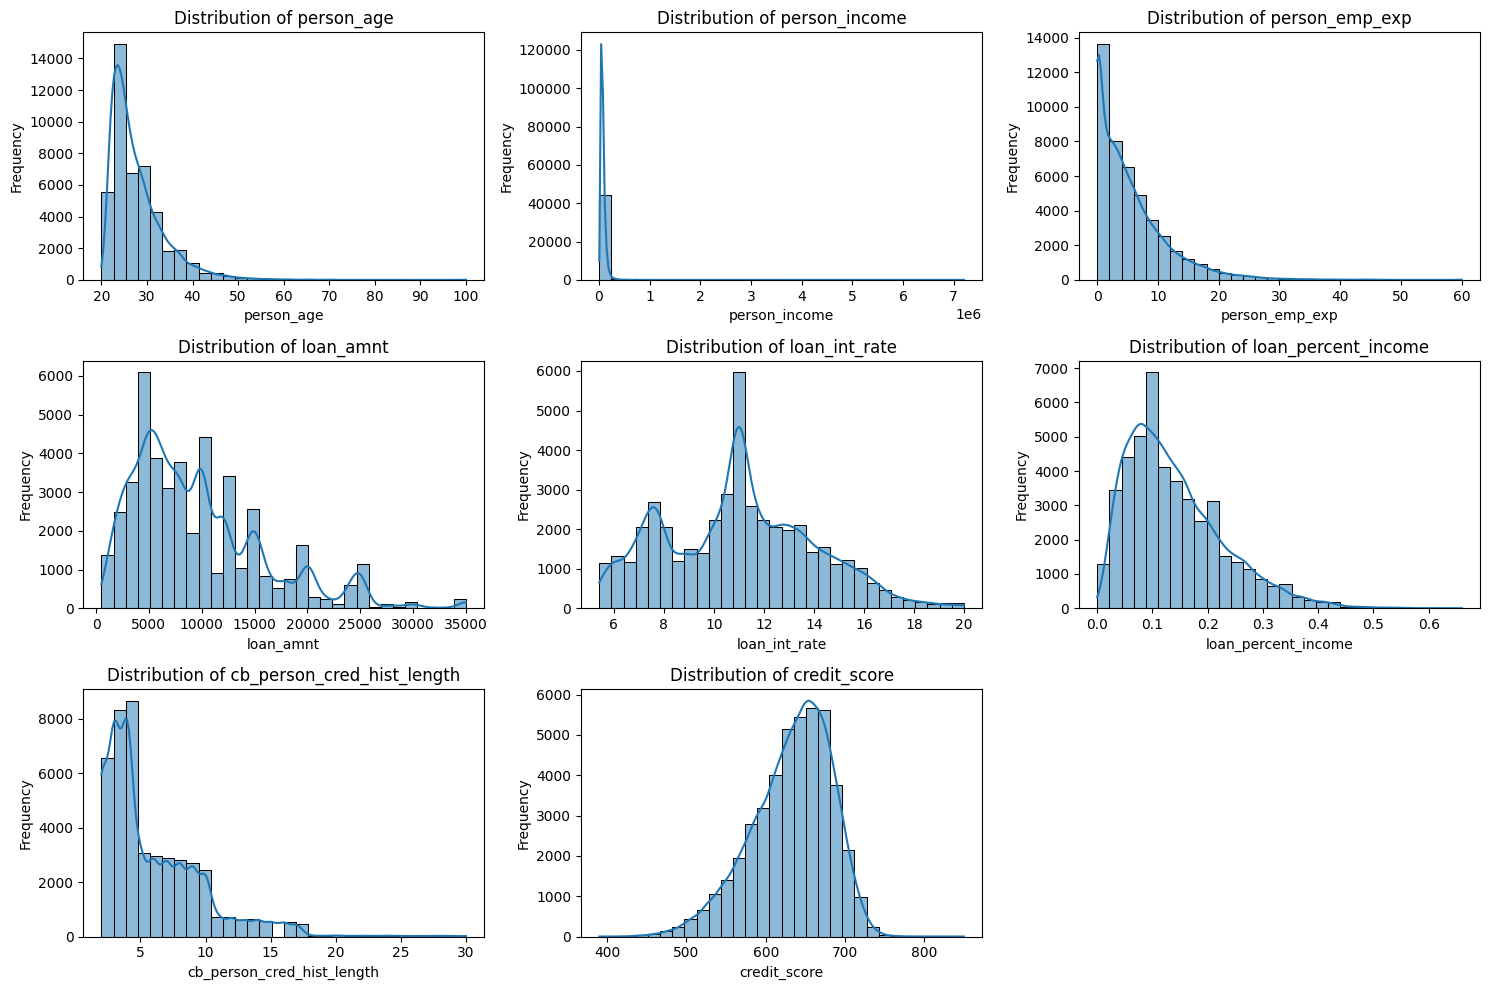

In [26]:
numerical_features = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


### Distribution of Target Variable (`loan_status`)

/tmp/ipython-input-801163296.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df, palette='viridis')


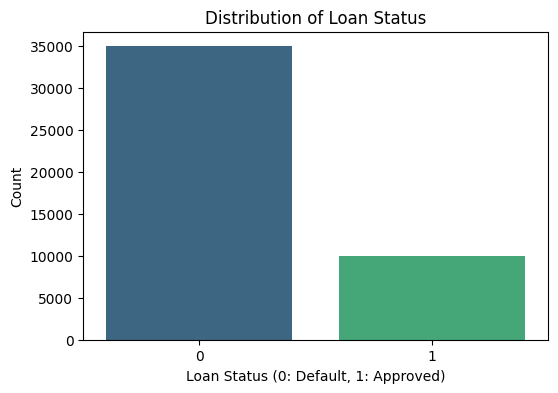

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=df, palette='viridis')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status (0: Default, 1: Approved)')
plt.ylabel('Count')
plt.show()


## Preprocess Data:

Prepare the data for machine learning by handling categorical features, addressing any missing values, and splitting the dataset into training and testing sets. Also, ensure numerical features are scaled if necessary.


**Rationale**:
To address the first instruction of handling outliers, I will cap the 'person_age' column at 100 and the 'person_emp_exp' column at 60, modifying the DataFrame in place.



In [8]:
df['person_age'] = df['person_age'].apply(lambda x: 100 if x > 100 else x)
df['person_emp_exp'] = df['person_emp_exp'].apply(lambda x: 60 if x > 60 else x)
print("Outliers in 'person_age' and 'person_emp_exp' columns have been capped.")

Outliers in 'person_age' and 'person_emp_exp' columns have been capped.


**Rationale**:
To prepare for model training, I will separate the features (X) from the target variable (y), which is the 'loan_status' column, as per the second instruction.



In [9]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']
print("Features (X) and target variable (y) have been separated.")

Features (X) and target variable (y) have been separated.


**Rationale**:
To apply one-hot encoding to categorical features in `X`, I will identify columns with 'object' or 'category' dtype and use `pd.get_dummies` to transform them, as per the third instruction.



In [10]:
X = pd.get_dummies(X, drop_first=True)
print("Categorical features in X have been one-hot encoded.")

Categorical features in X have been one-hot encoded.


**Rationale**:
To split the data into training and testing sets with an 80/20 ratio and stratification, I will use the `train_test_split` function from `sklearn.model_selection`, as per the fourth instruction.



In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Data has been split into training and testing sets.")

Data has been split into training and testing sets.


**Rationale**:
To scale the numerical features, I will first identify them, then initialize a `StandardScaler`, fit it on the numerical columns of `X_train`, and finally transform both the training and testing sets, as per the fifth instruction.



In [12]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns (excluding the one-hot encoded ones which are already 0/1)
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Numerical features in X_train and X_test have been scaled.")

Numerical features in X_train and X_test have been scaled.


## Train Classification Models

Select and train multiple classification algorithms, such as Logistic Regression, Decision Tree, and Random Forest, on the preprocessed training data to predict loan approval status.


**Rationale**:
To begin training the classification models as specified in the subtask, I will first import the required classes: `LogisticRegression`, `DecisionTreeClassifier`, and `RandomForestClassifier` from their respective scikit-learn modules. Then, I will initialize and train an instance of each model using the preprocessed training data (`X_train` and `y_train`) as per the instructions, setting `random_state=42` for reproducibility.



In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Logistic Regression
log_reg = LogisticRegression(random_state=42, solver='liblinear') # Added solver for older sklearn versions
log_reg.fit(X_train, y_train)
print("Logistic Regression model trained.")

# Initialize and train Decision Tree Classifier
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, y_train)
print("Decision Tree Classifier model trained.")

# Initialize and train Random Forest Classifier
rand_forest = RandomForestClassifier(random_state=42)
rand_forest.fit(X_train, y_train)
print("Random Forest Classifier model trained.")

Logistic Regression model trained.
Decision Tree Classifier model trained.
Random Forest Classifier model trained.


## Evaluate Models and Visualize Results

Evaluate the performance of each trained classification model using metrics like accuracy, precision, recall, F1-score, and ROC AUC. Generate visualizations such as confusion matrices and ROC curves to compare model performance.


**Rationale**:
To evaluate the performance of each trained model, I will first make predictions on the test set (`X_test`) and calculate the prediction probabilities for the positive class for each model, as per instructions 1 and 2.



In [14]:
y_pred_log_reg = log_reg.predict(X_test)
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]

y_pred_dec_tree = dec_tree.predict(X_test)
y_prob_dec_tree = dec_tree.predict_proba(X_test)[:, 1]

y_pred_rand_forest = rand_forest.predict(X_test)
y_prob_rand_forest = rand_forest.predict_proba(X_test)[:, 1]

print("Predictions and probabilities generated for all models.")

Predictions and probabilities generated for all models.


**Rationale**:
To continue evaluating the models, I will import the necessary metrics from `sklearn.metrics` and then calculate and print the accuracy, precision, recall, F1-score, and ROC AUC score for each trained model, as per instructions 3 and 4.



In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

models = {
    "Logistic Regression": (y_pred_log_reg, y_prob_log_reg),
    "Decision Tree": (y_pred_dec_tree, y_prob_dec_tree),
    "Random Forest": (y_pred_rand_forest, y_prob_rand_forest)
}

for model_name, (y_pred, y_prob) in models.items():
    print(f"\n--- {model_name} Metrics ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")



--- Logistic Regression Metrics ---
Accuracy: 0.8994
Precision: 0.7889
Recall: 0.7475
F1-Score: 0.7677
ROC AUC Score: 0.9562

--- Decision Tree Metrics ---
Accuracy: 0.8979
Precision: 0.7674
Recall: 0.7755
F1-Score: 0.7714
ROC AUC Score: 0.8542

--- Random Forest Metrics ---
Accuracy: 0.9284
Precision: 0.8942
Recall: 0.7690
F1-Score: 0.8269
ROC AUC Score: 0.9746


**Rationale**:
To further evaluate each model's performance and understand their classification errors, I will calculate and display the confusion matrix for each model, as per instruction 5.




--- Logistic Regression Confusion Matrix ---
[[6600  400]
 [ 505 1495]]


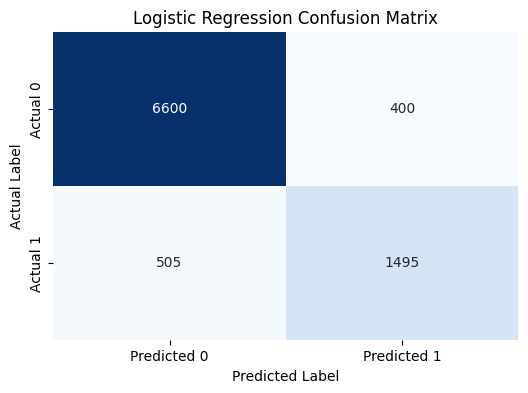


--- Decision Tree Confusion Matrix ---
[[6530  470]
 [ 449 1551]]


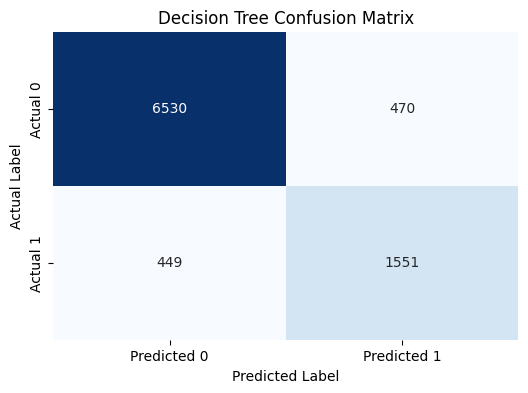


--- Random Forest Confusion Matrix ---
[[6818  182]
 [ 462 1538]]


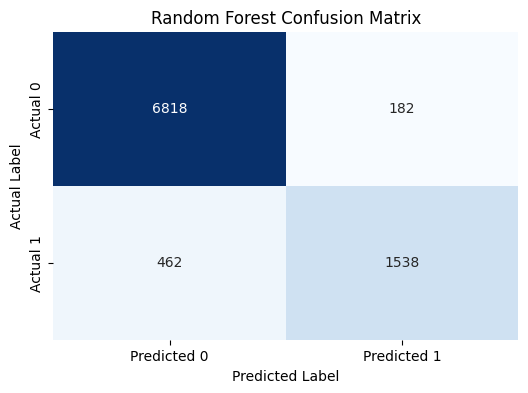

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

for model_name, (y_pred, y_prob) in models.items():
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n--- {model_name} Confusion Matrix ---")
    print(cm)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

**Rationale**:
To complete the model evaluation and visualization, I will now calculate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for each model using `roc_curve`, and then plot the ROC curve for each model, as per instructions 6 and 7.



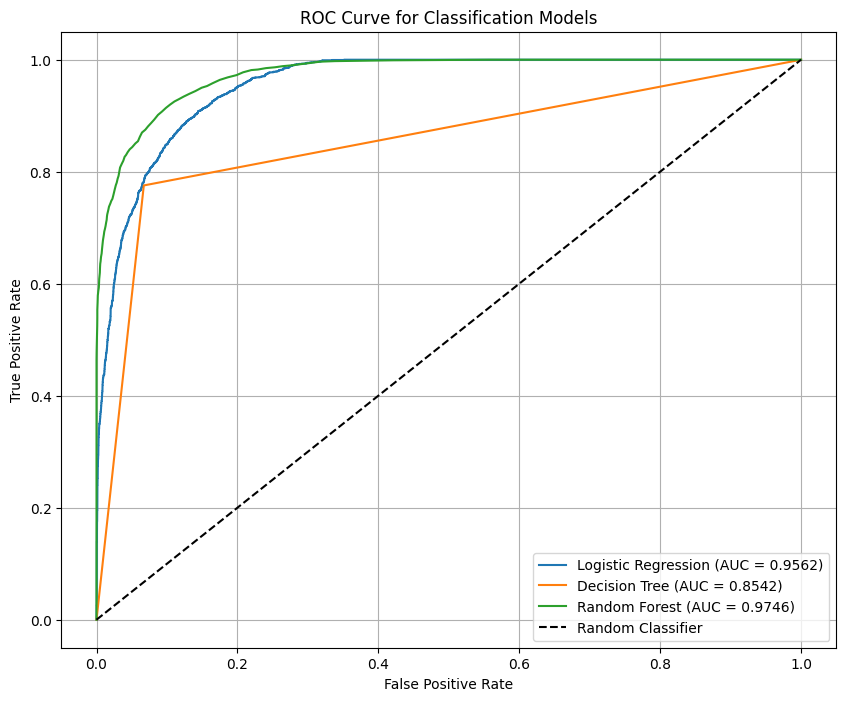

ROC curves generated for all models.


In [17]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 8))

for model_name, (y_pred, y_prob) in models.items():
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Classification Models')
plt.legend()
plt.grid(True)
plt.show()

print("ROC curves generated for all models.")

## Complete Hyperparameter Tuning for Random Forest

the hyperparameter tuning process for the Random Forest Classifier to identify the best hyperparameters and their corresponding ROC AUC score.


In [20]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Instruction 1: Define a hyperparameter distribution for the RandomForestClassifier
param_dist = {
    'n_estimators': randint(50, 200),  # Number of trees
    'max_features': ['sqrt', 'log2', None], # Number of features to consider for best split
    'max_depth': randint(5, 20),      # Maximum depth of the tree
    'min_samples_split': randint(2, 11), # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 11),  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]           # Whether bootstrap samples are used when building trees
}

# Instruction 2: Initialize RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                 param_distributions=param_dist,
                                 n_iter=50, # Number of parameter settings that are sampled
                                 cv=5,
                                 scoring='roc_auc',
                                 random_state=42,
                                 n_jobs=-1,
                                 verbose=1) # Set verbose to 1 to see progress

# Instruction 3: Fit the RandomizedSearchCV object to your training data
rand_search.fit(X_train, y_train)

# Instruction 4: Print the best hyperparameters found by the tuning process
print(f"\nBest Hyperparameters: {rand_search.best_params_}")

# Instruction 5: Print the corresponding best ROC AUC score achieved during tuning
print(f"Best ROC AUC Score: {rand_search.best_score_:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Hyperparameters: {'bootstrap': False, 'max_depth': 18, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 117}
Best ROC AUC Score: 0.9737


## Further Feature Engineering

Create new features by combining existing ones (e.g., interaction terms) to potentially enhance model performance. This will involve modifying X_train and X_test and then re-applying feature scaling.


**Rationale**:
To create new interaction features as per the subtask's first two instructions, I will multiply `person_income` with `loan_amnt` to create `income_loan_interaction` and `person_age` with `person_emp_exp` to create `age_emp_interaction` in both the `X_train` and `X_test` DataFrames. These new features aim to capture complex relationships between existing features.



In [21]:
X_train['income_loan_interaction'] = X_train['person_income'] * X_train['loan_amnt']
X_test['income_loan_interaction'] = X_test['person_income'] * X_test['loan_amnt']

X_train['age_emp_interaction'] = X_train['person_age'] * X_train['person_emp_exp']
X_test['age_emp_interaction'] = X_test['person_age'] * X_test['person_emp_exp']

print("New interaction features 'income_loan_interaction' and 'age_emp_interaction' created in X_train and X_test.")

New interaction features 'income_loan_interaction' and 'age_emp_interaction' created in X_train and X_test.


**Rationale**:
To complete the feature engineering subtask, I need to re-apply feature scaling to both `X_train` and `X_test`. This involves identifying all numerical columns (including the newly created interaction features), initializing a new `StandardScaler`, fitting it on `X_train`, and then transforming both `X_train` and `X_test`.



In [22]:
from sklearn.preprocessing import StandardScaler

# Identify all numerical columns (including the new interaction features)
# We need to re-identify numerical columns as new ones have been added and scaled numerical columns are still float64
# and unscaled numerical columns are also float64. It is better to use the columns from X to get a clean list before transformation
numerical_cols_after_interaction = X_train.select_dtypes(include=['float64', 'int64']).columns

# Initialize a new StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
X_train[numerical_cols_after_interaction] = scaler.fit_transform(X_train[numerical_cols_after_interaction])
X_test[numerical_cols_after_interaction] = scaler.transform(X_test[numerical_cols_after_interaction])

print("Numerical features in X_train and X_test, including new interaction features, have been scaled.")

Numerical features in X_train and X_test, including new interaction features, have been scaled.


## Evaluate Tuned Model

Instantiate and train a Random Forest Classifier with the best hyperparameters found, using the updated X_train. Then, evaluate its performance on the X_test using the same metrics as before.


**Rationale**:
To instantiate the tuned Random Forest Classifier, I will retrieve the best hyperparameters from the `rand_search` object and initialize a new `RandomForestClassifier` with these parameters and `random_state=42`. Then, I will train this model on the preprocessed `X_train` and `y_train` datasets, as per the first two instructions.



In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Instruction 1: Instantiate a RandomForestClassifier using the best hyperparameters
best_params = rand_search.best_params_
tuned_rand_forest = RandomForestClassifier(random_state=42, **best_params)

# Instruction 2: Train this new Random Forest model on the updated X_train and y_train
tuned_rand_forest.fit(X_train, y_train)
print("Tuned Random Forest Classifier model trained.")

# Instruction 3: Make predictions and probability predictions on the X_test
y_pred_tuned_rf = tuned_rand_forest.predict(X_test)
y_prob_tuned_rf = tuned_rand_forest.predict_proba(X_test)[:, 1]
print("Predictions and probabilities generated for the tuned Random Forest model.")

Tuned Random Forest Classifier model trained.
Predictions and probabilities generated for the tuned Random Forest model.


**Rationale**:
To evaluate the tuned Random Forest model, I will calculate and print the accuracy, precision, recall, F1-score, and ROC AUC score, then generate and display its confusion matrix. Finally, I will plot its ROC curve alongside the previously trained models for comparison, covering instructions 4, 5, and 6.




--- Tuned Random Forest Metrics ---
Accuracy: 0.9293
Precision: 0.9045
Recall: 0.7625
F1-Score: 0.8275
ROC AUC Score: 0.9758

--- Tuned Random Forest Confusion Matrix ---
[[6839  161]
 [ 475 1525]]


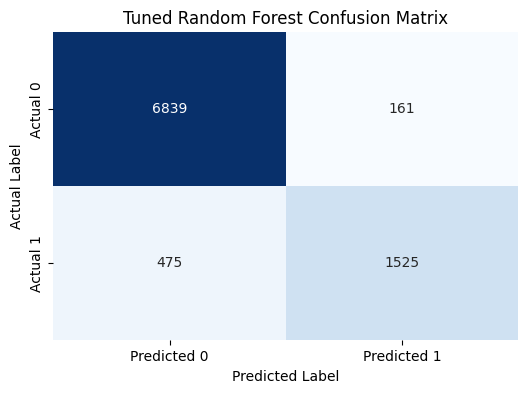

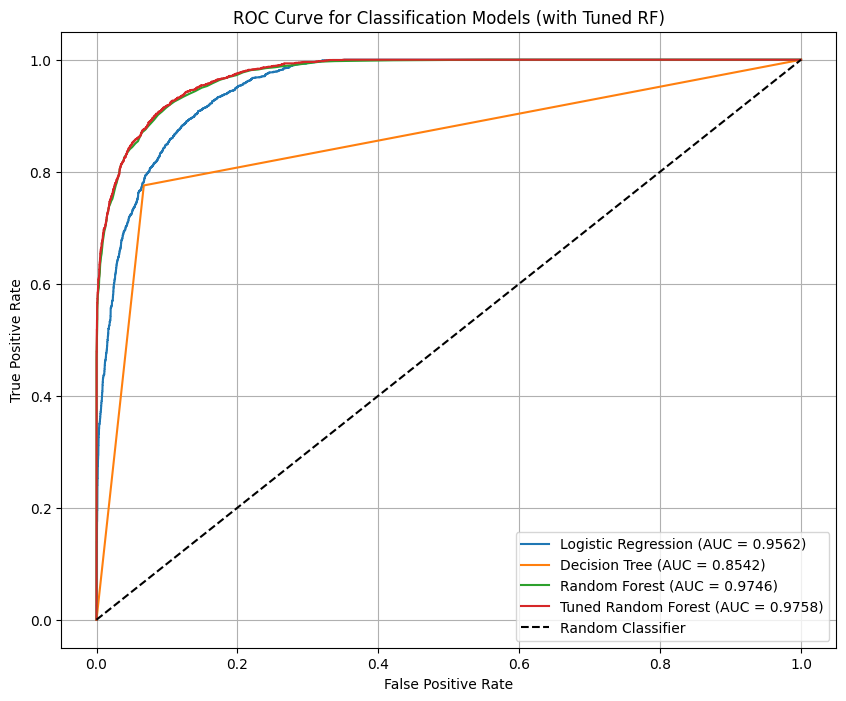

Evaluation metrics, confusion matrix, and ROC curve generated for the tuned Random Forest model, and ROC curves compared with previous models.


In [24]:
print("\n--- Tuned Random Forest Metrics ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_tuned_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_tuned_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_tuned_rf):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob_tuned_rf):.4f}")

# Generate and display the confusion matrix for the tuned Random Forest model
cm_tuned_rf = confusion_matrix(y_test, y_pred_tuned_rf)
print("\n--- Tuned Random Forest Confusion Matrix ---")
print(cm_tuned_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_tuned_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Tuned Random Forest Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Update the models dictionary to include the tuned Random Forest model
models["Tuned Random Forest"] = (y_pred_tuned_rf, y_prob_tuned_rf)

# Plot the ROC curve for all models, including the tuned one
plt.figure(figsize=(10, 8))

for model_name, (y_pred, y_prob) in models.items():
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Classification Models (with Tuned RF)')
plt.legend()
plt.grid(True)
plt.show()

print("Evaluation metrics, confusion matrix, and ROC curve generated for the tuned Random Forest model, and ROC curves compared with previous models.")